## Connect Intensive - Machine Learning Nanodegree

## Week 2. Getting to know our tools  

## Objectives    

- Some Python tips  
- Numpy
- Pandas 
- Data visualization with Matplotlib and Seaborn 

 - You should have completed the setup exercises from last week (see _Getting Started_ notebook if you haven't).

## 1 | Python Basics (Review) 

Some basic topics in Python programming you need to know:

* Data types
    * Numbers - integer or real. Operators: `+, -, *, /, //, %, **`
    * Strings - built-in class, can slice and add like a list. Operators: `+`. `%` is a special format operator
    * Lists - arrays, can slice, reverse, sort, pop, append, mutate. Operator: `+`
    * Dictionaries - hash table for fast searching
    * Booleans - `True` or `False`
    * Tuples - immutable arrays, cannot assign a value to a member
    * Sets - a collection of unique objects (untyped). This is not indexed, so S[1] is not legal syntax.
* Comparison Operators - `==, >, >=, <, <=, !=`
* Logic Operators - `and, or, not`
* if Statements
* for Loops
* while Loops
* range(start, stop, step) - returns a sequence of numbers from `start`, in increments of `step` less than `stop`.
* list comprehension - a convenient construct for manipulating all objects in a list and returning a new list
* dict comprehension - similar to list comprehension, but returns a dictionary
* functions - like any other modern language 
* lambda expressions - convenient _anonymous_ single statement functions
* zip, map and filter - 

Here is a link to a pretty [cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf) (and the [site](https://www.datacamp.com/community/tutorials/python-data-science-cheat-sheet-basics) that created it)



**Comprehensions** 

Python supports a very convenient syntax for manipulating a collection of objects. Consider this example:
1. Create a dictionary `my_dict` where each (English) uppercase character between A and Z is linked to its ASCII numeric value (the numbers 65 to 90. (_Hint:_ You an convert any 1-byte (0-255) integer to its ASCII character using the function `chr` or convert a single character string to its integer value using the function `ord`). 

You can create a dictionary by using `dict(A)` where A is a special list structure -- a list of lists of two elements each:

In [ ]:
A = [['A', ord('A')], ['B', ord('B')]]
dict(A)

In [ ]:
Another way is to start with an empty list and then add them one by one

In [ ]:
my_dict = {} # Create an empty dictionary
my_dict['A'] = ord('A')
my_dict['B'] = ord('B')
my_dict

Creating a list of 26 such elements using these two methods is clearly possible, but very tedious. Let's not do that!
How about a quick loop over 26 numbers? I'll do it for the first 4 - easy enough to change a 4 to a 26.

In [ ]:
my_dict = {} # Start fresh
for i in range(4):  # You need to know about the range function
    my_dict[chr(65 + i)] = 65 + i
my_dict

##### Exercise: 
Your turn to write the loop using lists

In [ ]:
# TODO - set up A as a list of 4 elements, each of which is a list like ['A', 65]
A = []
my_dict = dict(A)

** Answer **: You can write the loop in more than one way. I'll write down a traditional loop. See the two subsequent cells to see how this is done using comprehensions. You should choose to use comprehensions for simple loops like this when you can.

In [2]:
result = []
for i in range(65, 65+4):
    result.append((chr(i), i))  # creating a list of tuples
print(dict(result))

{'A': 65, 'C': 67, 'B': 66, 'D': 68}



List comprehension provides a shortened syntax for writing this loop

In [ ]:
A = [[chr(a), a] for a in range(65, 70)]
A

A `dictionary comprehension` creates the dictionary we would get after `dict(A)` in one statement. The syntax is similar to a list comprehension with a few differences. 

In [ ]:
{chr(a): a for a in range(65, 70)}

_Tangent_ (or deep dive) to research on your own
 - you can have nested comprehensions, but they can get a bit hard to read
 - you can use inline `if .. else` within a list comprehension
 - you can invoke functions within a list comprehension

### Functions 

Python uses the reserved word `def` and the syntax below to define a function. It shares the ability to pass in arguments and a get a result back with many other programming languages. Python passes all arguments by reference and therefore the logic inside a function can modify the input. The two functions `square` and `square_` below represent these two options. Run the cell below to confirm your intuition of what values in test and result are after each function call. 

##### When might it be useful to be able to manipulate the input as in `square_`?
_**Answer:**_ You may want to consider mutating the input (i.e., x) if x was a very large object, e.g., a pandas DataFrame that was several GBs. The python interpreter would have to use memory for two copies of x, one the input and the other the result for `square`, but only one copy for `square_`.

In [ ]:
def square(x): # Here x is a list of numbers (a vector)
    return [k**2 for k in x] # This function returns the element-wise square of the input array (vector)

def square_(x): # Here x is a list of numbers (a vector)
    for i, k in enumerate(x):
        x[i] = k**2
    
test = range(3)
testcopy = test
result = square(test)
print(test, result)
result = square_(test)
print(test, result)
print(testcopy)

_Notice the value of `testcopy` has also changed even though we didn't explicitly change it! _
This is a consequence of how Python manages variable names and something you need to be aware of when you write functions.

If you want to preserve the value of an object, to have to copy it using the `copy` module. There are two types of copy called _shallow copy_ and _deep copy_. In the example below we used a shallow copy.  Compare this to the result from the previous cell and notice that testcopy2 retained its value through the same operations that modified testcopy above.

In [ ]:
import copy

test = range(3)
testcopy2 = copy.copy(test)
result = square(test)
print(test, result)
result = square_(test)
print(test, result)
print(testcopy2)


Python supports syntax that allows you to name the arguments so you don't have to rely on the order in which they are passed in. 

In [ ]:
def subtract(_from=0, deduct=0): # I used _from as from is a reserved word in python
    return _from - deduct

print("Subtracting 2 from 3 should return {}".format(subtract(2, 3)))
print("This subtracts 3 from 2 and returns {}".format(subtract(3, 2)))
print("Using names overrides the order - subtracting 2 from 3 returns {}".format(subtract(_from=3, deduct=2)))
print("Subtract has defaults so we don't need to pass in arguments each time".format(subtract()))

We will see the use of named arguments a lot in `sklearn`. Many of the model functions (Regressors or Classifiers) 
have a large number of arguments or parameters that are conveniently chosen to get started quickly. All the arguments
can be "tweaked" while refining the model.

#### Lambda Expressions

Sometimes you want to write a line of code that needs to be applied to a list or dictionary but you don't want to have to name it to keep all the code togther (you often see this with a pandas DataFrame's `apply` method). Python provides a convenient way to define these functions using what is known as a `lambda` expression or function.

In [ ]:
lfunction = lambda var: var*2
print(lfunction)

# Let's use it 
print(lfunction(7))

Since the function doesn't have a name, if we don't assign it to a name, we can't really use it. On the other hand, if we _do_ assign it a name, then we lose one if its key advanages (that it doesn' need a name). As a result, like `anonymous` functions in other languages, you often see `lambda` as arguments to other functions.

#### Map and Filter
`Map` and `filter` are two such functions that can make effective use of lambda functions. `Shift-enter` through the next four cells and see if you can make sense of these two functions

In [ ]:
x = [1, 2, 3, 4]
?map
map(lfunction, x) # lfunction (named function) returns the value multiplied by 2

In [ ]:
map(lambda var: var**2, x) # An example using a lambda function with no name

In [ ]:
#?filter
filter(lambda var: var%2 == 0, x) # returns all the even elements in the input list x

A final caveat for today's lesson -- while `lambda` functions are convenient, they are costly to run as they need to be compiled each time they are encountered during execution. Use them with care, but when you see them in someone else's code, you should know what these expressions mean.


## 2 | Data visualization with matplotlib (and seaborn)

`matplotlib` is the library of choice for data visualization in python. Other libraries that provide visualization, e.g., `pandas` provide methods using the implementation in `matplotlib`.

`matplotlib` is very flexible, but that makes using it for complex plots somewhat challenging. `seaborn` is one of a collection of other libraries that provide wrappers around matplotlib for these more advanced plots.

Let's start by importing the libraries:

In [2]:
try:
    import numpy as np
    print("Successfully imported numpy! Version {}".format(np.version.version))
except ImportError:
    print("Could not import numpy!")

Successfully imported numpy! Version 1.13.1


In [3]:
try:
    import pandas as pd
    print("Successfully imported pandas! Version {}".format(pd.__version__))
except ImportError:
    print("Could not import pandas!")
    
try:
    import matplotlib
    import matplotlib.pyplot as plt
    print("Successfully imported matplotlib! Version {}".format(matplotlib.__version__))
except ImportError:
    print("Could not import matplotlib!")

try:
    import seaborn as sns
    print("Successfully imported seaborn! Version {}".format(sns.__version__))
except ImportError:
    print("Could not import seaborn!")
    
%matplotlib inline

Successfully imported pandas! Version 0.20.3
Successfully imported matplotlib! Version 2.0.2
Successfully imported seaborn! Version 0.8.0


In [ ]:
# A simple one-column dataframe of random numbers
data = pd.DataFrame(np.random.random(1000)*100)
data.columns = ['Numbers']
data.head()

In the Titanic disaster practice project, you saw how you could plot histograms for a DataFrame object. Here is another type of plot called a density (for _probability density_) plot. This displays a best guess for the continuous probability distribution that could have led to the data sample. 
###### From the figure you see after you run the cell, can you tell what distribution we actually used when we used the `np.random.random` function?

In [ ]:
data.plot.density()  # can specify number of bins
plt.xlabel('Random Number')
#plt.ylabel('Frequency')  # We don't need to create the ylabel as the DataFrame.plot already does that for us
plt.title('Density of Random Numbers');

There are many available plot types in pandas visualization, e.g, 
 - data.plot.area     
 - data.plot.barh     
 - data.plot.density  
 - data.plot.hist     
 - data.plot.line     
 - data.plot.scatter
 - data.plot.bar      
 - data.plot.box      

Here `data` is a variable name of class `pandas.DataFrame`.

Lets try another visualization mixed in with some pandas manipulation. The `np.random.normal` function provides a random sample of number from the normal distrbution centered on its mean with standard deviation as another parameter. Use ? to figure out what the 50 and 10 correspond to.

We create a dataframe with three columns, one of which is a series of random numbers drawn from a normal distribution. The first column is a simple sequence and the third column is a label whose value is either 1 or 2.

In [ ]:
g = np.random.normal(50, 10, 200)

data_g = pd.DataFrame({"idx":np.arange(1,201), "G":g, "label":np.random.uniform(0,1.0, 200)})
#data_g[data_g.label > 0.8].label = 2.0
#data_g[data_g.label < 2.0].label = 1.0

data_g.describe()

Here are a couple of plots showing some parameters you can change and see what they do
 s - size of the symbols that are plotted (notice they are not all the same)
 c - color of the symbols
 alpha - transparency (between 0 and 1)
 
The last line uses a `matplotlib` function `scatter` to plot two vectors X and Y (one element each) in a different color size and transparency. There are many other parameters and styles you can use to make pretty plots!

In [ ]:
sz = np.array(data_g.G) + 2.0
data_g.plot.scatter(x="idx", y="G", s=sz, c="blue", alpha=0.2)
plt.scatter([100], data_g[['G']].mean(), c='red', alpha=0.4, s=100);

#### Exercise

That's most of the walkthrough. Let's put together a few of the concepts reviewed above toward our in-class topic on metrics and errors.

1. Create a numpy array with 100 elements linearly spaced between 0 and 10. Call it `X`.
2. A line or a inear function of x would be an array whose elements are $ m \times x + b $ where $ m $ and $ b $ are parameters. Create a function called f_line which takes $m$, $b$, and `X` as arguments and returns the linear function of `X`. 

In [6]:
#TODO
X = np.linspace(0, 10, 100)
def f_line(m, b, X):
    return X*m + b

I've put together a function `quick_plot` that creates a scatter plot of input vectors X and Y and superimposes a line plot of a prediction vector (model).

In [7]:
def quick_plot(X, Y, model):
    plt.figure(2)
    plt.scatter(X, Y, c="blue", alpha=0.3, s=50.0 )
    plt.plot(X, model, c="gray")
    plt.ylim(Y.min(), Y.max())
    plt.show()

Run the next cell with different values of m,b and sigma and note the results for large ($ \approx 5.0 $) and small ($ \approx 0.1 $) `sigma`. The pre-filled values for the parameters are for you to change.

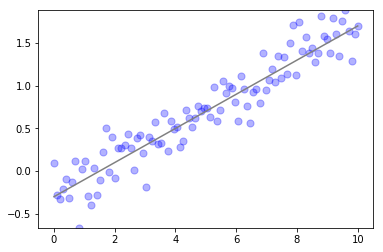

In [29]:
#TODO Assign values to m and b (keep them between -1.0 and 1.0)
Y=f_line(m=0.2, b=-0.3, X=X);
#TODO - Assign a value to sigma (between 0.1 and 5.0)
sigma = 0.2

# r is a vector of random numbers drawn from a normal distribution centered on 0, with a standard deviation of sigma.
# quick_plot overlays the "observed" noisy data (Y+random values) and the underlying true value (Y).
r =  np.random.normal(0, sigma, len(X))
quick_plot(X, Y + r, Y)

## 3 | Mean Squared Error

Let's look at the previous exercise a little bit more. We know that the true values masked by random noise are given by Y (we will denote it as $\hat{Y}$. Our _observed_ vector is Y+r; lets call it $O$. Calculate the MSE of Y and Y+r using numpy arrays.
$$ MSE = {\Sigma_{i=0}^N (O_i - \hat{y_i})^2 \over N } $$

In [30]:
#TODO
def mse(ytrue, ypred):
    return np.mean((ytrue-ypred)**2)

O = Y + r
print(mse(O, Y))

0.0397120541425


Calculate another trial function Z, using f_line with slightly different inputs and calculate the MSE for this model. Do you think its possible to get a _lower_ MSE with the "wrong" trial function?

In [31]:
# TODO
Z = f_line(m=0.21, b=-0.31, X=X)
print mse(O, Z)

0.0407042921396


when you have "noise" in your data (and there is always "noise"), the line that gives you the minimum `mse` could be different from the original one. So, when we try to deduce a model from data, we won't know with certainty that we solved a problem.
